In [1]:
using PyPlot
using HDF5

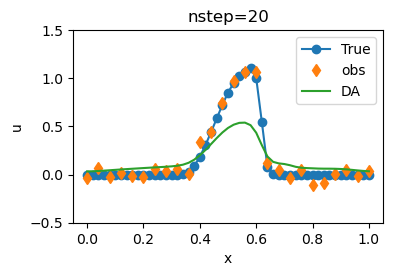

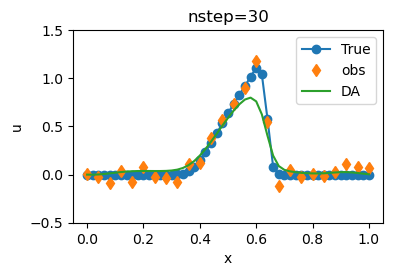

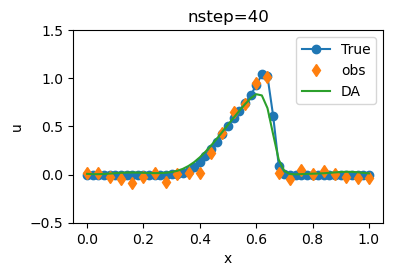

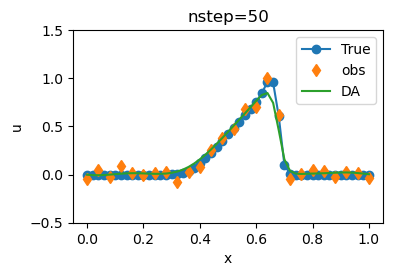

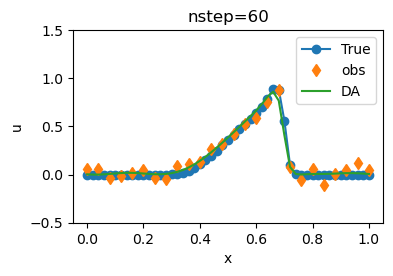

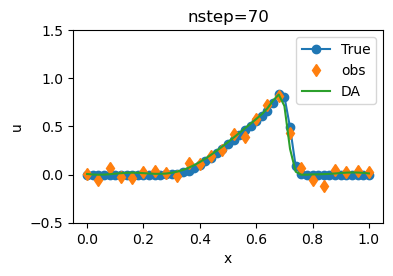

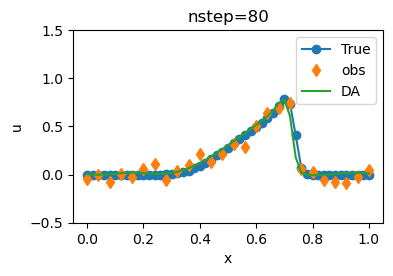

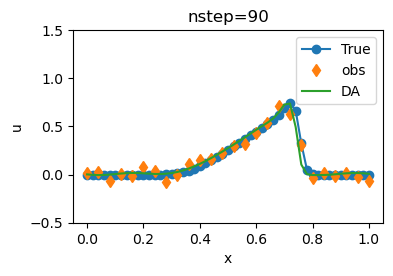

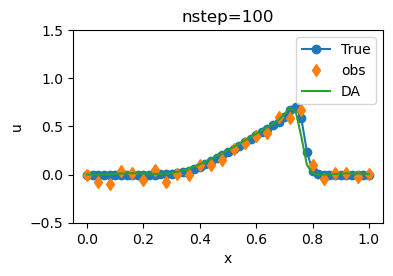

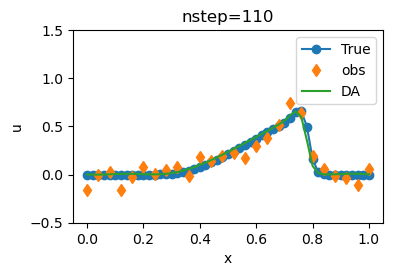

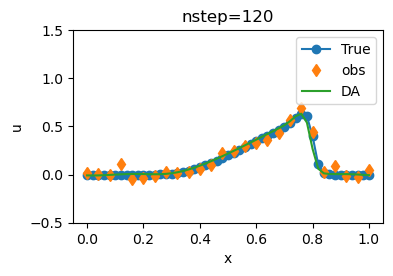

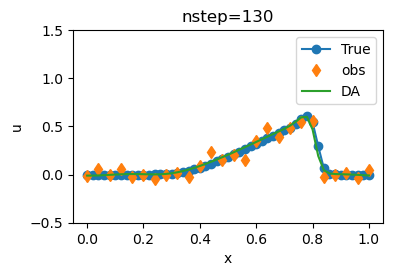

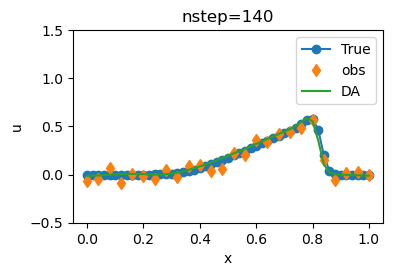

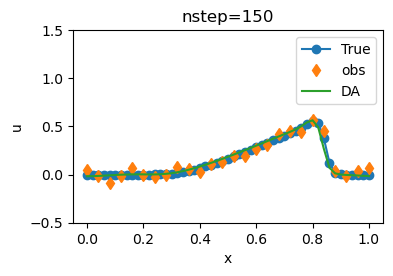

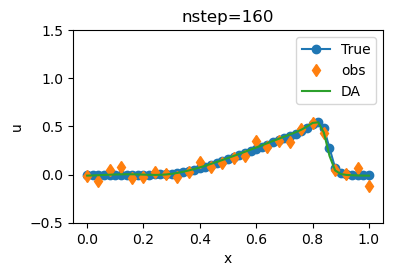

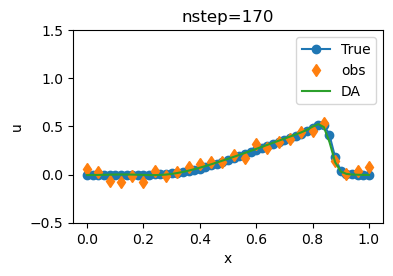

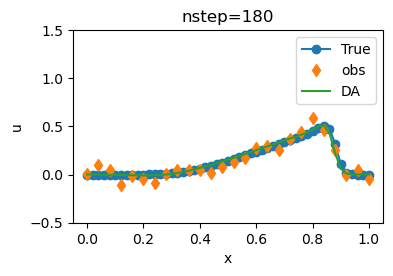

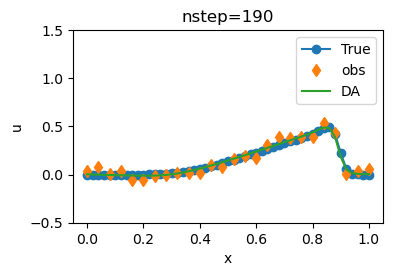

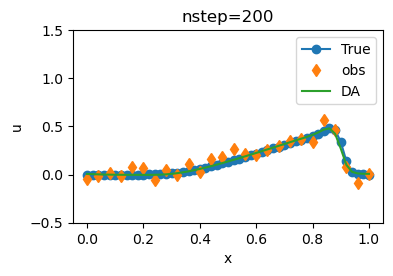

In [51]:
nstep = 200
ndata = 10
pdis = 2

for n=20:nstep
    if n%ndata == 0
        filename = "data_true/data_true"*string(n)*".h5"
        file = h5open(filename, "r") 
        nutrue = read(file, "nu")
        utrue = read(file, "u")
        close(file)
        filename = "data_obs/data_obs"*string(n)*".h5"
        file = h5open(filename, "r") 
        uobs = read(file, "u")
        close(file)

        filename = "data_result/data_result"*string(n)*".h5"
        file = h5open(filename, "r") 
        nuda = read(file, "nu")
        uda = read(file, "u")
        uda1 = read(file, "u_xa1")
        uda2 = read(file, "u_xa2")
        close(file)
        
        fig = plt.figure(figsize = (4, 2.5))
        ax1 = fig.add_subplot(111)
        ax1.plot(0:0.02:1, utrue, marker="o", label="True")
        ax1.plot(0:0.04:1, uobs[1:pdis:51], "d", label="obs")
        ax1.plot(0:0.02:1, uda,  label="DA")
        #ax1.plot(uda1, label="Xa1")
        #ax1.plot(uda2, label="Xa2")
        ax1.legend()
        ax1.set_ylim(-0.5,1.5)
        ax1.set_title("nstep="*string(n))
        ax1.set_xlabel("x")
        ax1.set_ylabel("u")
        plt.savefig("Fig/U-"*string(n)*".pdf", )
    end
end

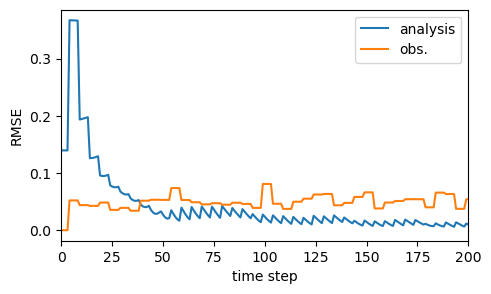

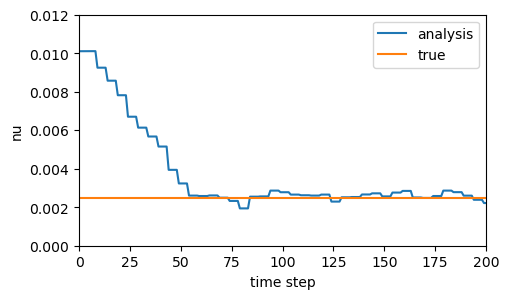

In [44]:
filename = "data_result/data_RMS.h5"
file = h5open(filename, "r") 
rms_a = read(file, "rms_a")
rms_o = read(file, "rms_o")
step_nu = read(file, "step_nu")
close(file)

fig = plt.figure(figsize = (3.5*1.5,3))
ax1 = fig.add_subplot(111)
ax1.plot(rms_a, label="analysis")
ax1.plot(rms_o, label="obs.")
#ax1.set_ylim(0.0,1.5)
ax1.set_xlim(0,200.0)
ax1.set_xlabel("time step")
ax1.set_ylabel("RMSE")

ax1.legend()

plt.savefig("Fig/RMSE-U-burgers.pdf", bbox_inches="tight")


fig = plt.figure(figsize = (3.5*1.5,3))
ax1 = fig.add_subplot(111)
ax1.plot(step_nu, label="analysis")
ax1.plot([0,200], [0.0025,0.0025], label="true")

ax1.set_ylim(0.0,0.012)
ax1.set_xlim(0,200.0)
ax1.set_xlabel("time step")
ax1.set_ylabel("nu")

ax1.legend()

plt.savefig("Fig/nu-burgers.pdf", bbox_inches="tight")